

# Project: No-Show Appoinment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the questionof whether or not patients show upfor their appointment. A number of characteristics about the patient areincluded in each row.

     ● ‘ScheduledDay’ tells us onwhat day the patient set up theirappointment.
     ● ‘Neighborhood’ indicates the location of the hospital.
     ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
     ● The last column: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
**Question**
* What is the relationship between the patient who show up & did not according to Gender?
* What is the relationship between the patient who show up & did not according to Age?
* What is the relationship between the patient who show up & did not according to Hypertension?
* What is the relationship between the patient who show up & did not according to Handicap?
* What is the relationship between the patient who show up & did not according to Alcoholism?
* What is the relationship between the patient who show up & did not according to Diabetes?
* What is the relationship between the patient who show up & did not according to Neighbourhood?
* What is the relationship between the patient who show up & did not according to SMS received?
 


In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# The number of rows (patients) and columns 
df.shape

(110527, 14)

In [4]:
# print information about the Dataset including the index data type and columns, non-null values and memory usage.
# Look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### **No missing data in this dataset.**

*because the number of values for each column equal to 110527 which is equal to the numbers of rows.*

In [5]:
# Generate descriptive statistics of Dataset columns.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### We found somethings:

  * The mean (average) of Age of patents is 37 years old.
  * The minimum value of Age is -1 which doesn't make sense.
  * The maximum value of Age is 115 years old.



## Data Cleaning

In [6]:
# Check for null values under an entire Dataset

df.isnull().values.any()

False

In [7]:
# Count the null values under an entire Dataset

df.isnull().sum().sum()

0

### No null values in this Dataset

In [8]:
# Replace -1 in Age with 0
df['Age'] = df['Age'].replace([-1],0)
df.nlargest(10, ['Age'])
df['Age'] = df['Age'].replace([115,102],100)

In [9]:
# Replace the 2 largest Age [115,102] with 100
df['Age'] = df['Age'].replace([115,102],100)

In [10]:
# After discussing the structure of the data and any problems that need to be cleaned.
# We often won't need any ID or Day like patient ID, Appointment ID, scheduled day and appointment day in our Data Analysis

df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'ScheduledDay' ], axis = 1, inplace = True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# we found also that the column "No-show" should be renamed
df.rename(columns = {'No-show':'No_show'}, inplace = True)

# show the dataset after Renaming No-show
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# correct the spelling of "Neighborhood"
df.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True)
df.head()

,Gender,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# correct the spelling of "Hipertension"
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
df.head()

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Also, correct the spelling of "Handcap"
df.rename(columns = {'Handcap':'Handicap'}, inplace = True)
df.head()

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# In "Neighborhood" column
# Convert first character to uppercase and remaining to lowercase.

df['Neighborhood'] = df['Neighborhood'].str.capitalize()
df.head()

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim da penha,0,1,0,0,0,0,No
1,M,56,Jardim da penha,0,0,0,0,0,0,No
2,F,62,Mata da praia,0,0,0,0,0,0,No
3,F,8,Pontal de camburi,0,0,0,0,0,0,No
4,F,56,Jardim da penha,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Let us take a general look on the data

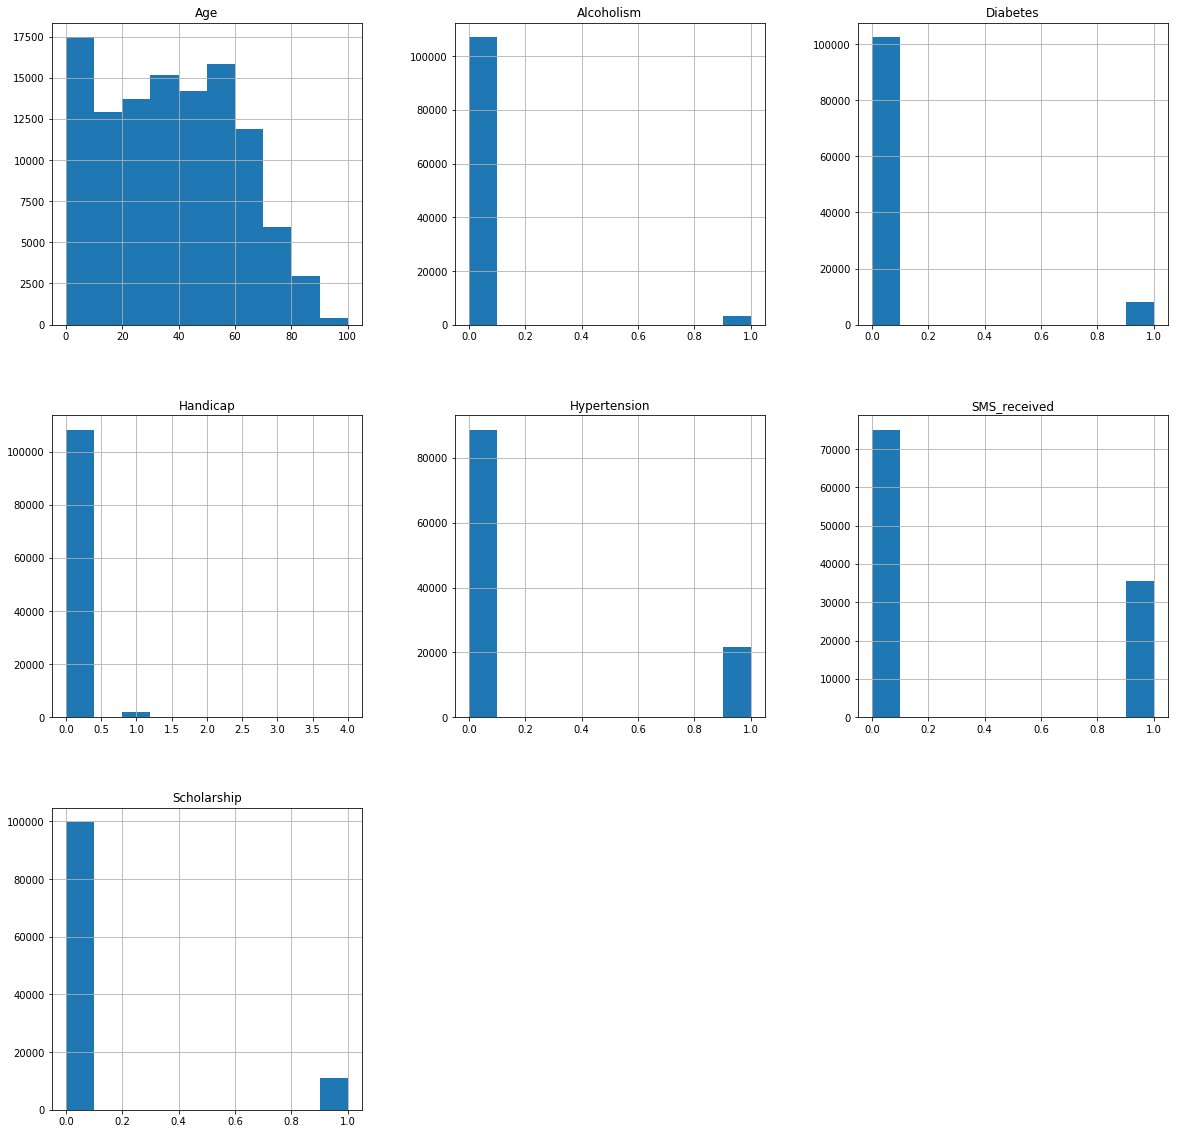

In [16]:
# Make a histogram of the Dataset’s.
df.hist(figsize = (20,20));

   * About 20000 out of 110000 (18%) suffer from Hypertension.
   * About 10% are enrolled in Brasilian welfareprogram Bolsa Família.
   * The Most of Patients did not suffer from chronic diseases.
   * **Number of Patients who recevied the SMS is half of those who didn't.**

In [17]:
# Assign another values to column "No_show" instead of No & Yes
showup = df.No_show == 'No'
noshowup = df.No_show == 'Yes'

In [18]:
## compare between the number of who showed up to their appointment and who did not show up.
df[showup].count()

Gender          88208
Age             88208
Neighborhood    88208
Scholarship     88208
Hypertension    88208
Diabetes        88208
Alcoholism      88208
Handicap        88208
SMS_received    88208
No_show         88208
dtype: int64

In [19]:
df[noshowup].count()

Gender          22319
Age             22319
Neighborhood    22319
Scholarship     22319
Hypertension    22319
Diabetes        22319
Alcoholism      22319
Handicap        22319
SMS_received    22319
No_show         22319
dtype: int64

#### We found that: **The number of thos who show is 4 times who did not show!**

## Other Characteristics

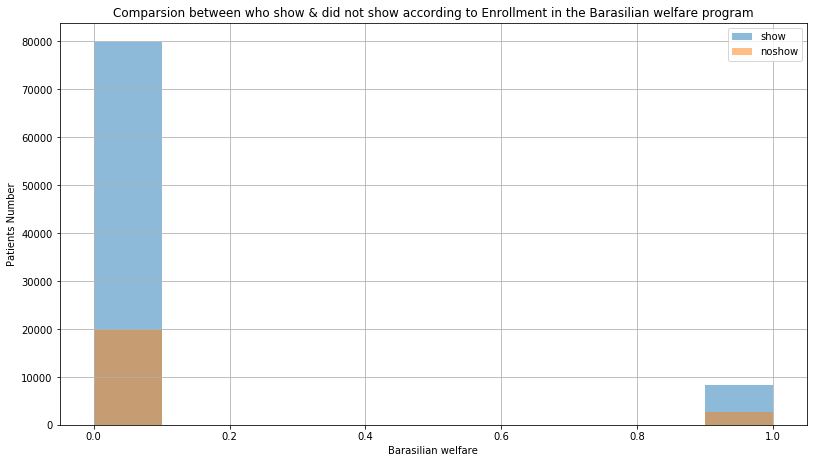

In [20]:
# compare between who show & did not show according to Enrollment in the Barasilian welfare program

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Scholarship[showup].hist(alpha = 0.5, label = 'show')
df.Scholarship[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Enrollment in the Barasilian welfare program')
plt.xlabel('Barasilian welfare')
plt.ylabel('Patients Number');

In [21]:
# Now, compare the number of who show & did not show according to Enrollment in the Barasilian welfare program

print(df.Scholarship[showup].value_counts())
print(df.Scholarship[noshowup].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


The relation is insignificant (No correlation)

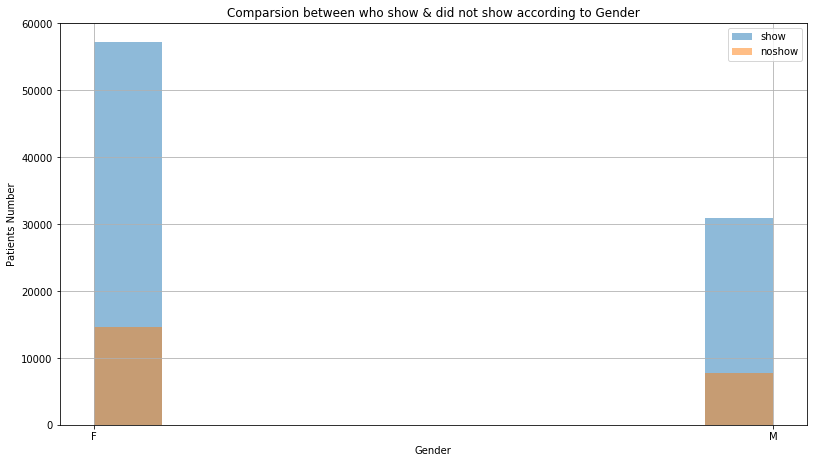

In [22]:
# compare between who show & did not show according to Gender

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Gender[showup].hist(alpha = 0.5, label = 'show')
df.Gender[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number');

In [23]:
# Now, compare the number of who show & did not show according to Gender

print(df.Gender[showup].value_counts())
print(df.Gender[noshowup].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


In [24]:
# call .groupby() and pass the name of column you want to group on, which is "Gender".
# Then, you use ["No_show"] to specify the columns on which you want to perform the actual aggregation.
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Also, Gender is insignificant.
We found that the number of Females who show & did not show are more the Males

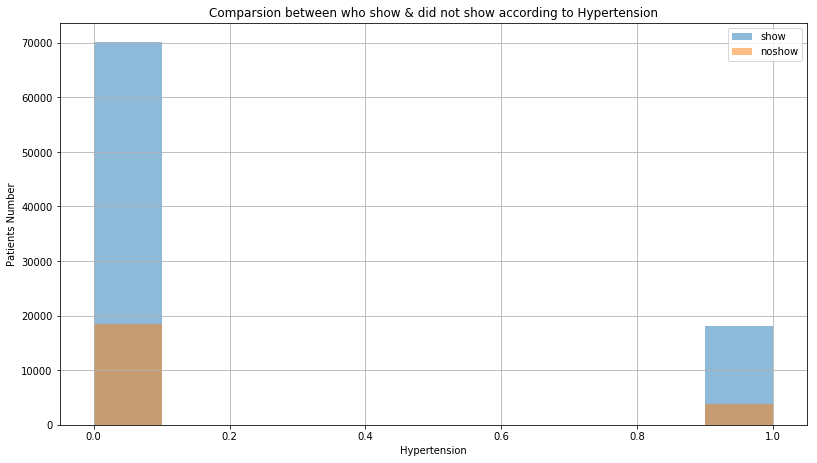

In [25]:
# compare between who show & did not show according to Hypertension

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Hypertension[showup].hist(alpha = 0.5, label = 'show')
df.Hypertension[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Patients Number');

In [26]:
# Now, compare the number of who show & did not show according to Hypertension

print(df.Hypertension[showup].value_counts())
print(df.Hypertension[noshowup].value_counts())

0    70179
1    18029
Name: Hypertension, dtype: int64
0    18547
1     3772
Name: Hypertension, dtype: int64


Hypertension is insignificant (No correlation)

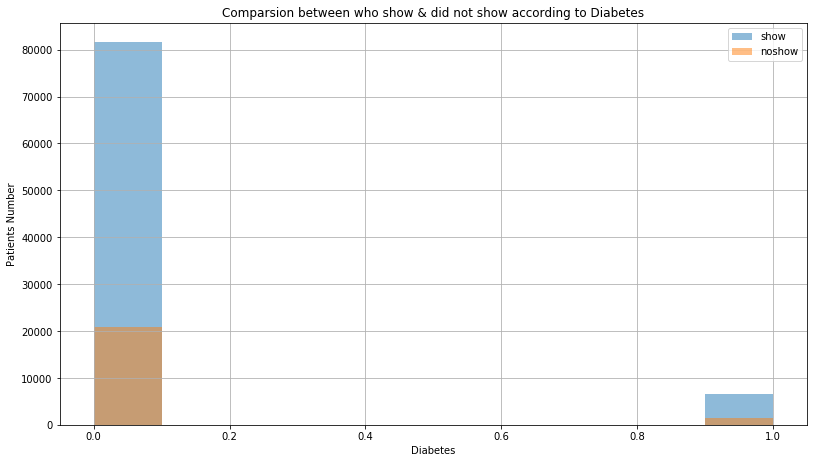

In [27]:
# compare between who show & did not show according to Diabetes

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Diabetes[showup].hist(alpha = 0.5, label = 'show')
df.Diabetes[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patients Number');

Also, Diabetes is insignificant

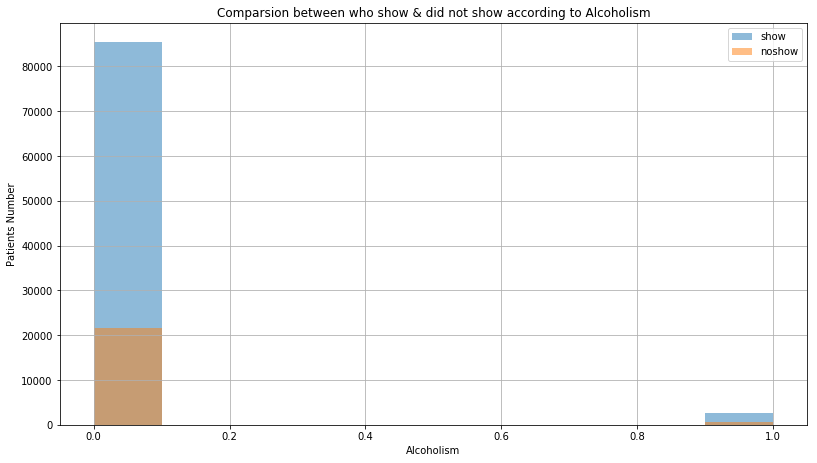

In [28]:
# compare between who show & did not show according to Alcoholism

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Alcoholism[showup].hist(alpha = 0.5, label = 'show')
df.Alcoholism[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Patients Number');

Also, Alcoholism is insignificant (No correlation)

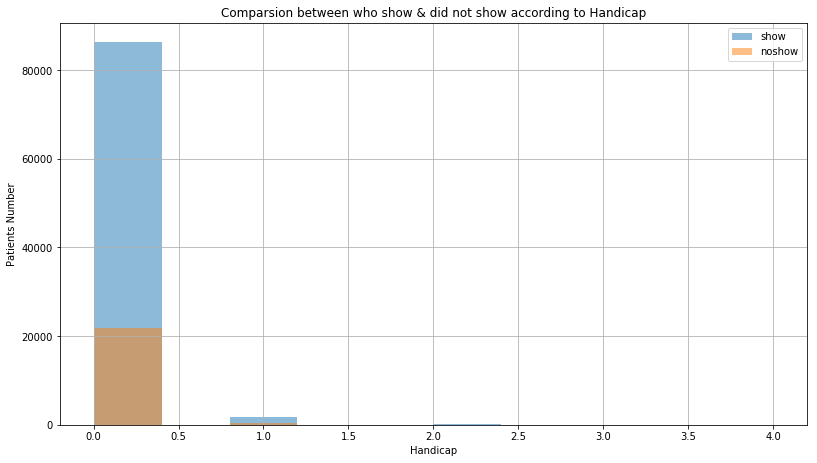

In [29]:
# compare between who show & did not show according to being Handicapped

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Handicap[showup].hist(alpha = 0.5, label = 'show')
df.Handicap[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Handicap')
plt.xlabel('Handicap')
plt.ylabel('Patients Number');

Handicap is insignificant (No correlation)

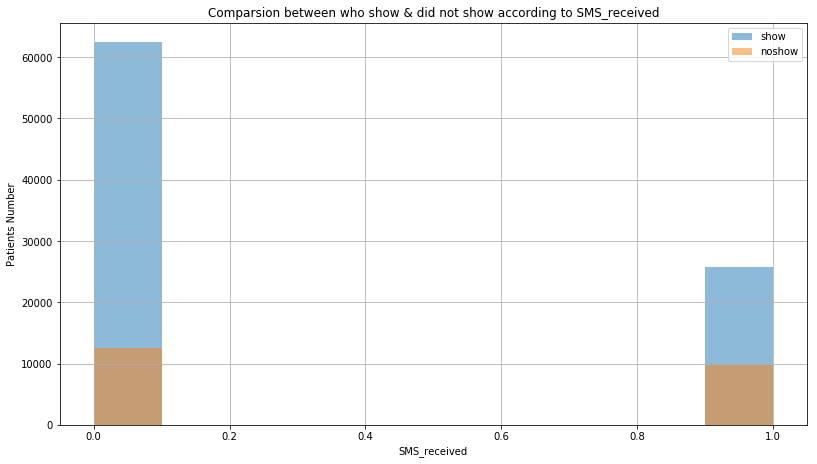

In [30]:
# compare between who show & did not show according to SMS they received

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.SMS_received[showup].hist(alpha = 0.5, label = 'show')
df.SMS_received[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Patients Number');

In [31]:
# Now, compare the number of who show & did not show according to SMS_received

print(df.SMS_received[showup].value_counts())
print(df.SMS_received[noshowup].value_counts())

0    62510
1    25698
Name: SMS_received, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


Here, we found that more people showed without receiving a SMS!

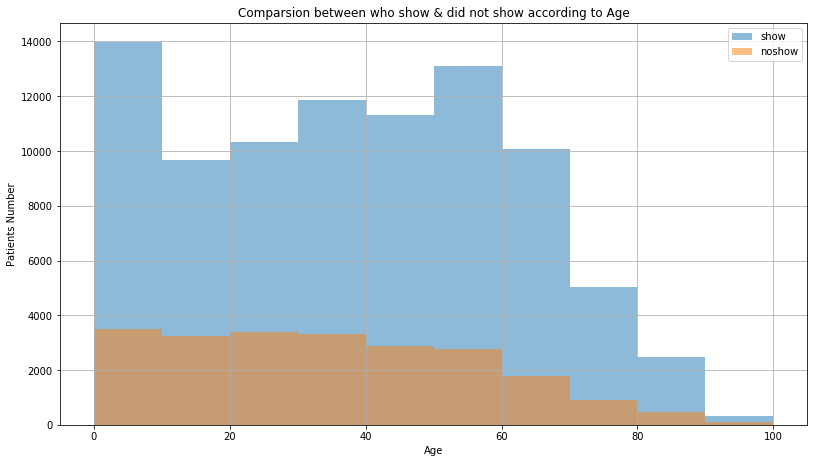

In [32]:
# compare between who show & did not show according to Age

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Age[showup].hist(alpha = 0.5, label = 'show')
df.Age[noshowup].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Age')
plt.xlabel('Age')
plt.ylabel('Patients Number');

* Age between 0 to 10 is the most of who showed and go to the clinic.
* Age between 35 to 70 is the Second of who showed up.
* The older the age, the fewer the Patients.

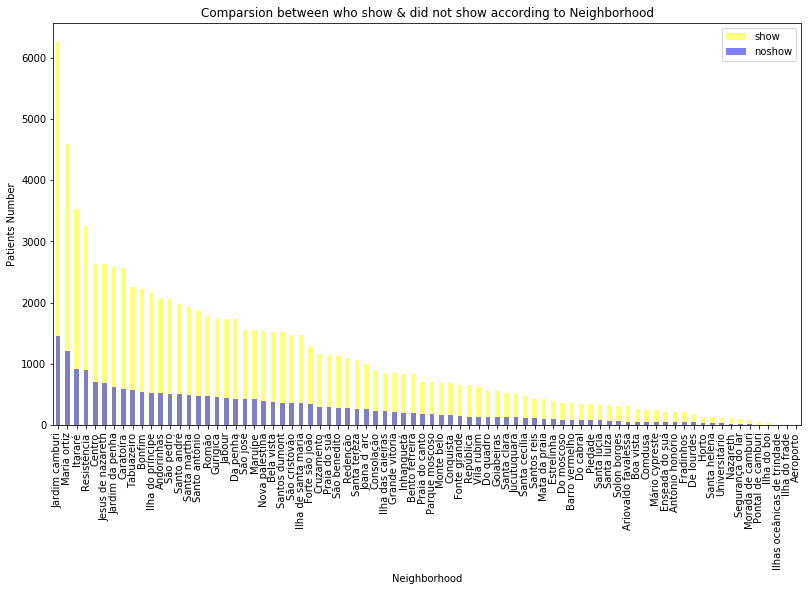

In [33]:
# compare between who show & did not show according to Neighborhood    

plt.figure(figsize=[13.40, 7.40])

# alpha is a value between 0 and 1 specifying the transparency of each histogram.
df.Neighborhood[showup].value_counts().plot (kind = 'bar', alpha = 0.5, color = 'yellow', label = 'show')
df.Neighborhood[noshowup].value_counts().plot (kind = 'bar', alpha = 0.5, color = 'blue', label = 'noshow')
plt.legend()
plt.title('Comparsion between who show & did not show according to Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Patients Number');

We observe that Neighborhood has a huge effect on showing up

<a id='conclusions'></a>
## Conclusions

* More people showed without receiving a SMS! which is strange.
* Age between 0 to 10 is the most of who showed and go to the clinic.
* Age between 35 to 70 is the Second of who showed up.
* The older the age, the fewer the Patients.
* **The Neighborhood has a huge effect on showing up.**
* The number of thos who show is 4 times who did not show!

  **Limitations** We could not reach a correlative relationship between the Patients and most of the Characteristics like: "Gender", "Hypertension", etc..
 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0